# Projet numérique 2 #

## Question 1 ##

- $\dot x_1$ modélise la croissance du nombre de proies
- $\dot x_2$ modélise la croissance du nombre de prédateurs
- $\alpha$ est le facteur de reproduction des proies
- $\beta$ est le facteur modélisant la présence de prédateurs sur l'évolution de la population de proies
- $\gamma$ est le facteur de disparition des prédateurs sans proies
- $\delta$ est le facteur modélisant la présence de proies sur l'évolution de la population prédateurs

Le système est $\dot x = f(x)$ avec $f(x_1,x_2)=(x_1(\alpha -\beta x_2), -x_2(\gamma - \delta x_1))$
On remarque deux points qui annulent f : (0,0) et $(\gamma / \delta , \alpha / \beta)$
Les deux points appartiennent bien à $\mathbb{R+*}$. Ce sont les points d'équilibre cherchés.

Calculons la matrice jacobienne de f.  
$J_f((0,0)) = \begin{pmatrix} \alpha & 0 \\ 0 & -\gamma \end{pmatrix}$  
Il y a une valeur propre à partie réelle négative ($-\alpha$) donc par lien entre stabilité et stabilité du linéarisé tangent, (0,0) est instable.

$J_f(\overline x) = \begin{pmatrix} 0 & -\alpha \\ \gamma & 0 \end{pmatrix}$  
Les deux valeurs propres ont une partie réelle nulle, on ne peut rien savoir à ce stade sur la stabilité de $\overline x$.

# Question 2 #

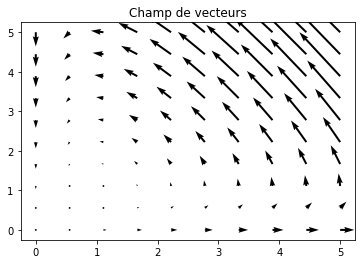

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x1, x2, alpha=1, beta=1, gamma=1, delta=1):
    return (np.multiply(x1,(alpha-beta*x2)), np.multiply(-x2,(gamma - delta*x1)))

x, y = np.linspace(0, 5, 10), np.linspace(0, 5, 10)
X, Y = np.meshgrid(x, y)
U, V = f(X,Y)
plt.title('Champ de vecteurs')
plt.quiver(X,Y,U,V)

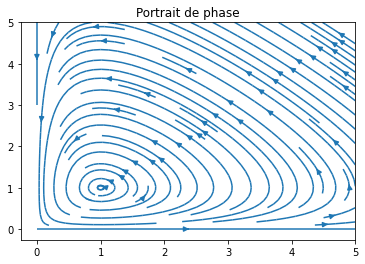

In [2]:
plt.title('Portrait de phase')
plt.streamplot(X, Y, U, V)

Les solutions semblent périodiques.

## Question 4 ##

Soit x1 et x2 des réels positifs.  

$\partial H / \partial x_1 = \dot x_2 / x_2 x_1$  
$\partial H / \partial x_2 = - \dot x_1 / x_2 x_1$


## Question 5 ##

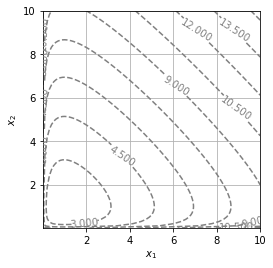

In [3]:

def H(x1, x2):
    return (x1 - np.log(x1) + x2 - np.log(x2))

def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = H(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")
    
display_contour(f, x=np.linspace(0.01, 10, 100), y=np.linspace(0.01, 10, 100), levels=10)

## Question 6 ##

In [19]:
def solve_euler_explicit(f, x0:list, dt, t0, tf):
    t = np.arange(t0, tf, dt)
    x = [np.array(x0)]
    for k in t[:-1]:
        x.append(np.add(x[-1], dt*f(k, x[-1])))
    return t,x
    

solve_euler_explicit(lambda t, x: x, [1], 0.1, 0, 1)
# Il s'agit bien de l'exponentielle entre 0 et 1.

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 [array([1]),
  array([1.1]),
  array([1.21]),
  array([1.331]),
  array([1.4641]),
  array([1.61051]),
  array([1.771561]),
  array([1.9487171]),
  array([2.14358881]),
  array([2.35794769])])

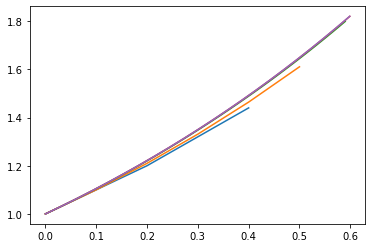

In [5]:
for k in [0.2, 0.1, 0.01, 0.001]:
    plt.plot(solve_euler_explicit(lambda t, x: x, 1, k, 0, 0.6)[0], solve_euler_explicit(lambda t, x: x, 1, k, 0, 0.6)[1])
    #legend
    
t = np.arange(0, 0.6, 0.001)
y = np.exp(t)
plt.plot(t,y)
plt.show()

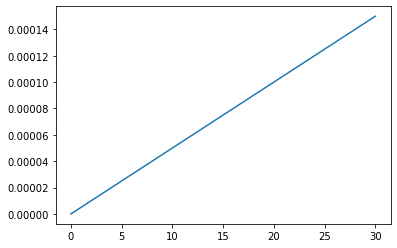

In [6]:
dt = 0.00001

t = np.arange(0, 30, dt)
difference = (np.exp(t) - solve_euler_explicit(lambda t, x: x, 1, dt, 0, 30)[1])/np.exp(t)


plt.plot(t,difference)
plt.show()

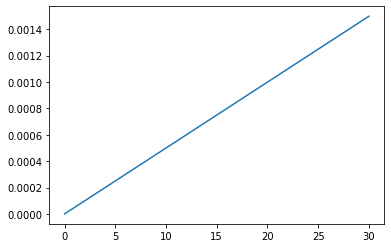

In [7]:
#Ordre 1

dt = 0.0001

t = np.arange(0, 30, dt)
der_approx = np.subtract(solve_euler_explicit(lambda t, x: x, 1, dt, 0, 30)[1][1:],solve_euler_explicit(lambda t, x: x, 1, dt, 0, 30)[1][:-1])/dt
difference = (np.exp(t)[:-1] - der_approx)/np.exp(t)[:-1]

plt.plot(t[:-1],difference)
plt.show()

## Question 7 ##

In [21]:
def f(k, x, alpha=1, beta=1, gamma=1, delta=1):
    return np.array([x[0]*(alpha-beta*x[1]), -x[1]*(gamma - delta*x[0])])

solve_euler_explicit(f, [2,3], 0.1, 0, 30)

(array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
         2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
         3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
         4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
         5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
         6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
         7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
         8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
         9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
        11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
        12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
        13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
        14.3, 14.4, 14.5, 14.6, 14.7, 

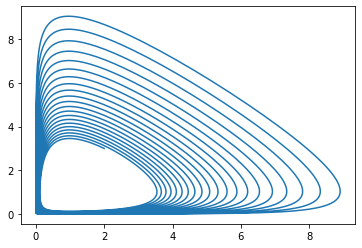

In [49]:
A = np.array(solve_euler_explicit(f, [2,3], 0.01, 0, 200)[1])
plt.plot(A[:,0], A[:,1])
plt.show()